Практическое задание 4, стажировка, Cometa IT Bootcamp

Практическое задание заключается в следующем:

Прописать все свои хосты в инвентори-файле (файл скинуть в гитхаб).

Убедиться, что все хосты доступны с ansible-сервера путем использования модуля ping (скриншот приложить).

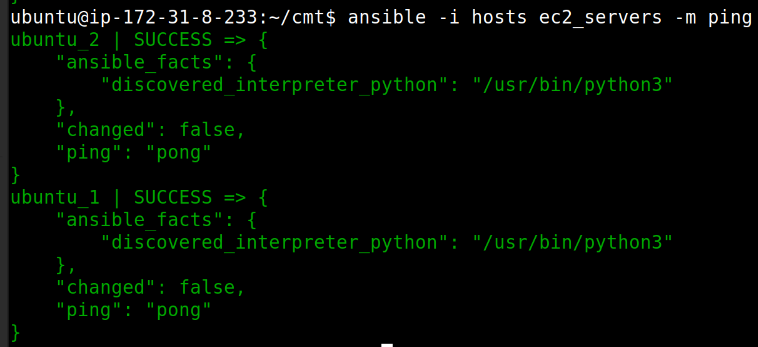

Написать несколько плейбуков (все плейбуки скинуть в гитхаб и снабдить комментариями):

3.1. Должен устанавливать веб-сервер nginx на хост, включать и запускать сервис nginx.

```bash
---
- name: Install and start Nginx web server # Здесь мы задаём название сценарию(play-у)
  hosts: all # для всех хостов в файле hosts(inventory)
  become: yes # нужно чтобы всё выполнялось от рута

  tasks: # эта строка объявляет контейнер задач
    - name: Install Nginx # имя задачи
      apt: # указано чтобы использовался менеджер загрузки apt 
        name: nginx # имя пакета
        state: present # пакет должен быть установлен
        update_cache: yes # это как sudo apt update

    - name: Ensure Nginx is enabled and running 
      systemd: # мы обращаемся к менеджеру служб для управления системой и службами
        name: nginx
        enabled: yes # мы тут включаем службу при загрузке системы
        state: started # запуск службы
```

3.2. Копировать html-страницу (заранее приготовленную) в каталог веб-сервера на хост. По открытии айпи адреса хоста должна отображаться html-страница.

```bash
---
- name: Deploy HTML page to web servers
  hosts: all
  become: yes
  tasks:
    - name: Copy HTML file to Nginx web server directory
      ansible.builtin.copy: # обращаемся к модулю для копирования файлов
        src: /home/ubuntu/cmt/index.html # что и откуда в локальной машине
        dest: /usr/share/nginx/html/index.html # место в удаленной машине

    - name: Ensure Nginx is running
      ansible.builtin.service: # аналог systemd.
      # почитал немного различие про них обоих. 
      # systemd является более узким тк нужно чтоб система использовала systemd
      # ansible включает в себя systemd и еще несколько модулей для управленяи службами 
        name: nginx
        state: started
        enabled: yes
```

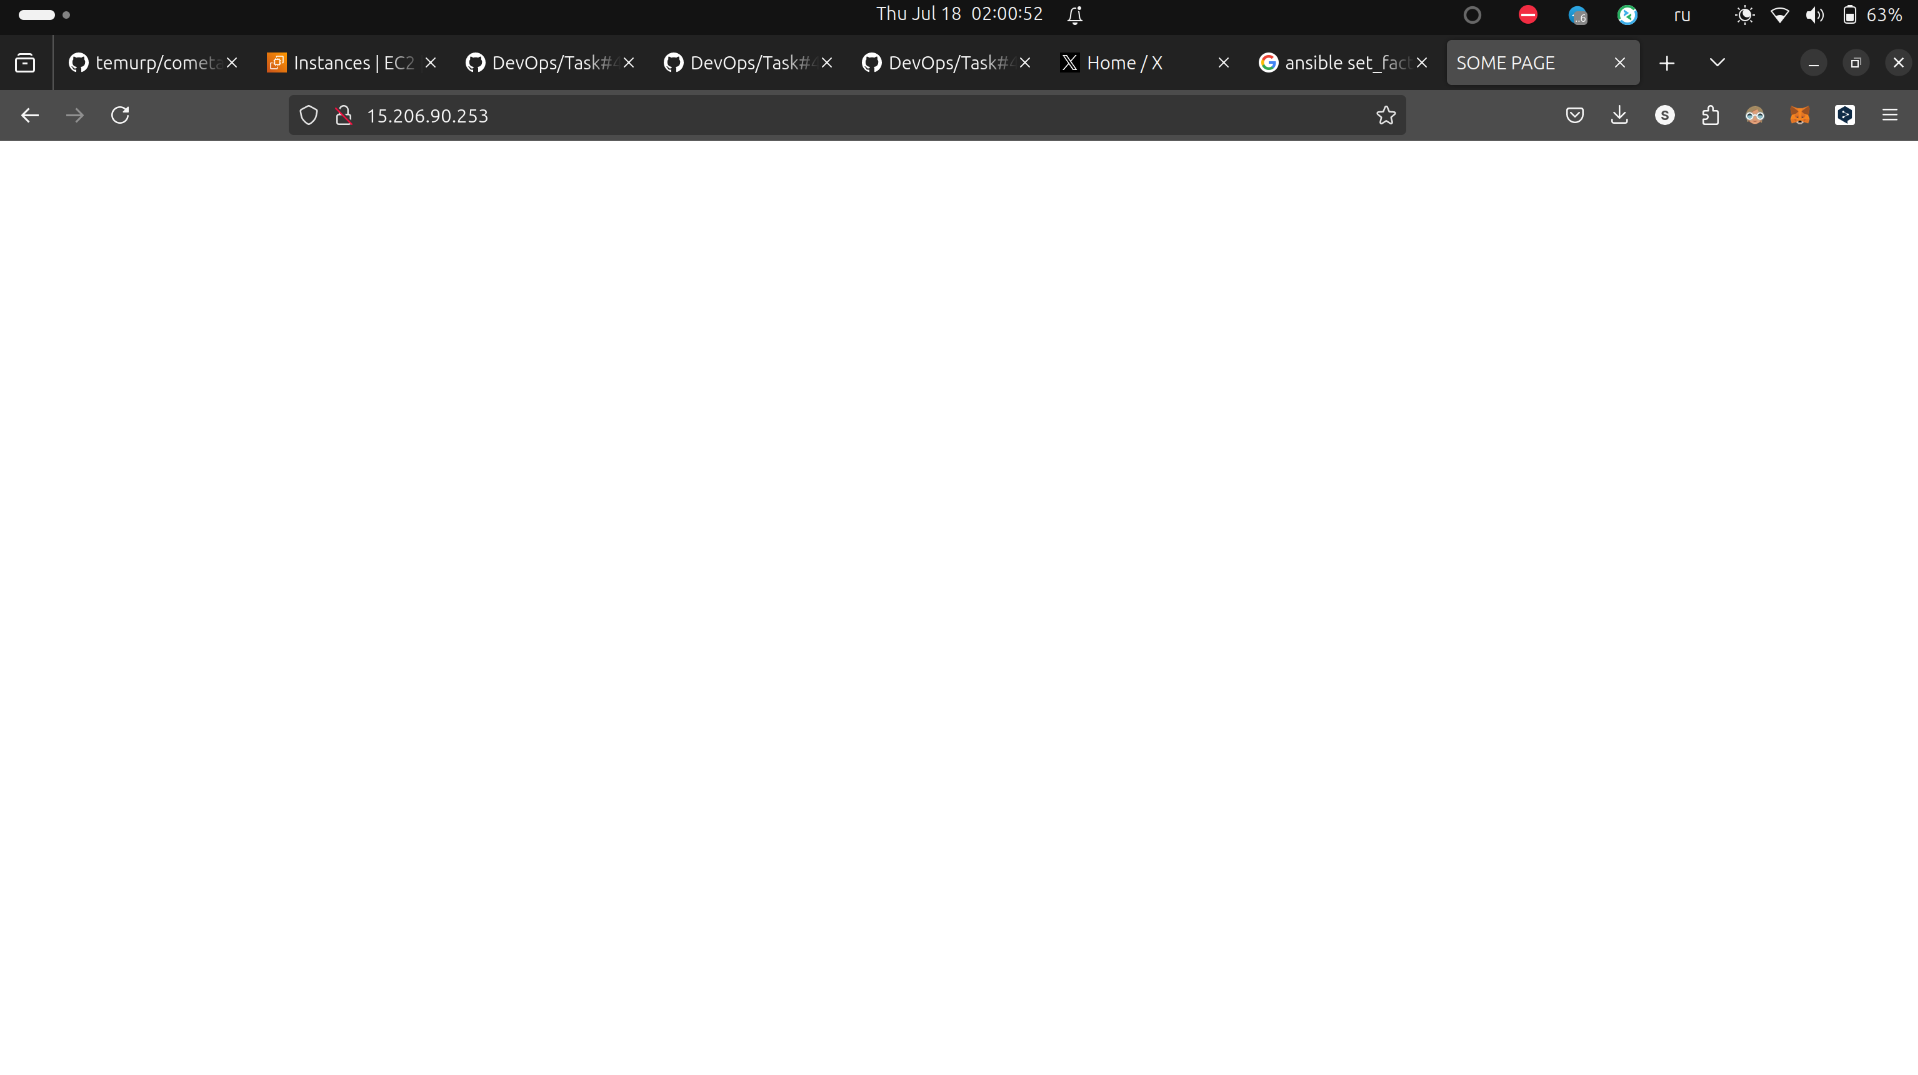

3.3. Должен устанавливать СУБД Postresql на хост, создаваться новая база и новый пользователь по имени OSCAR.

4. Установить докер на одной из EC2 инстанций. Установить SQL Developer (или любой клиент для работы с СУБД) на свой компьютер.
   
5. Установите образ Oracle Database 21c XE с DockerHub и запустите контейнер. Подключитесь к запущенной БД с помощью клиента и создайте несколько таблиц, заполните их данными, сделайте выборку из них. (приложите скриншоты)
   
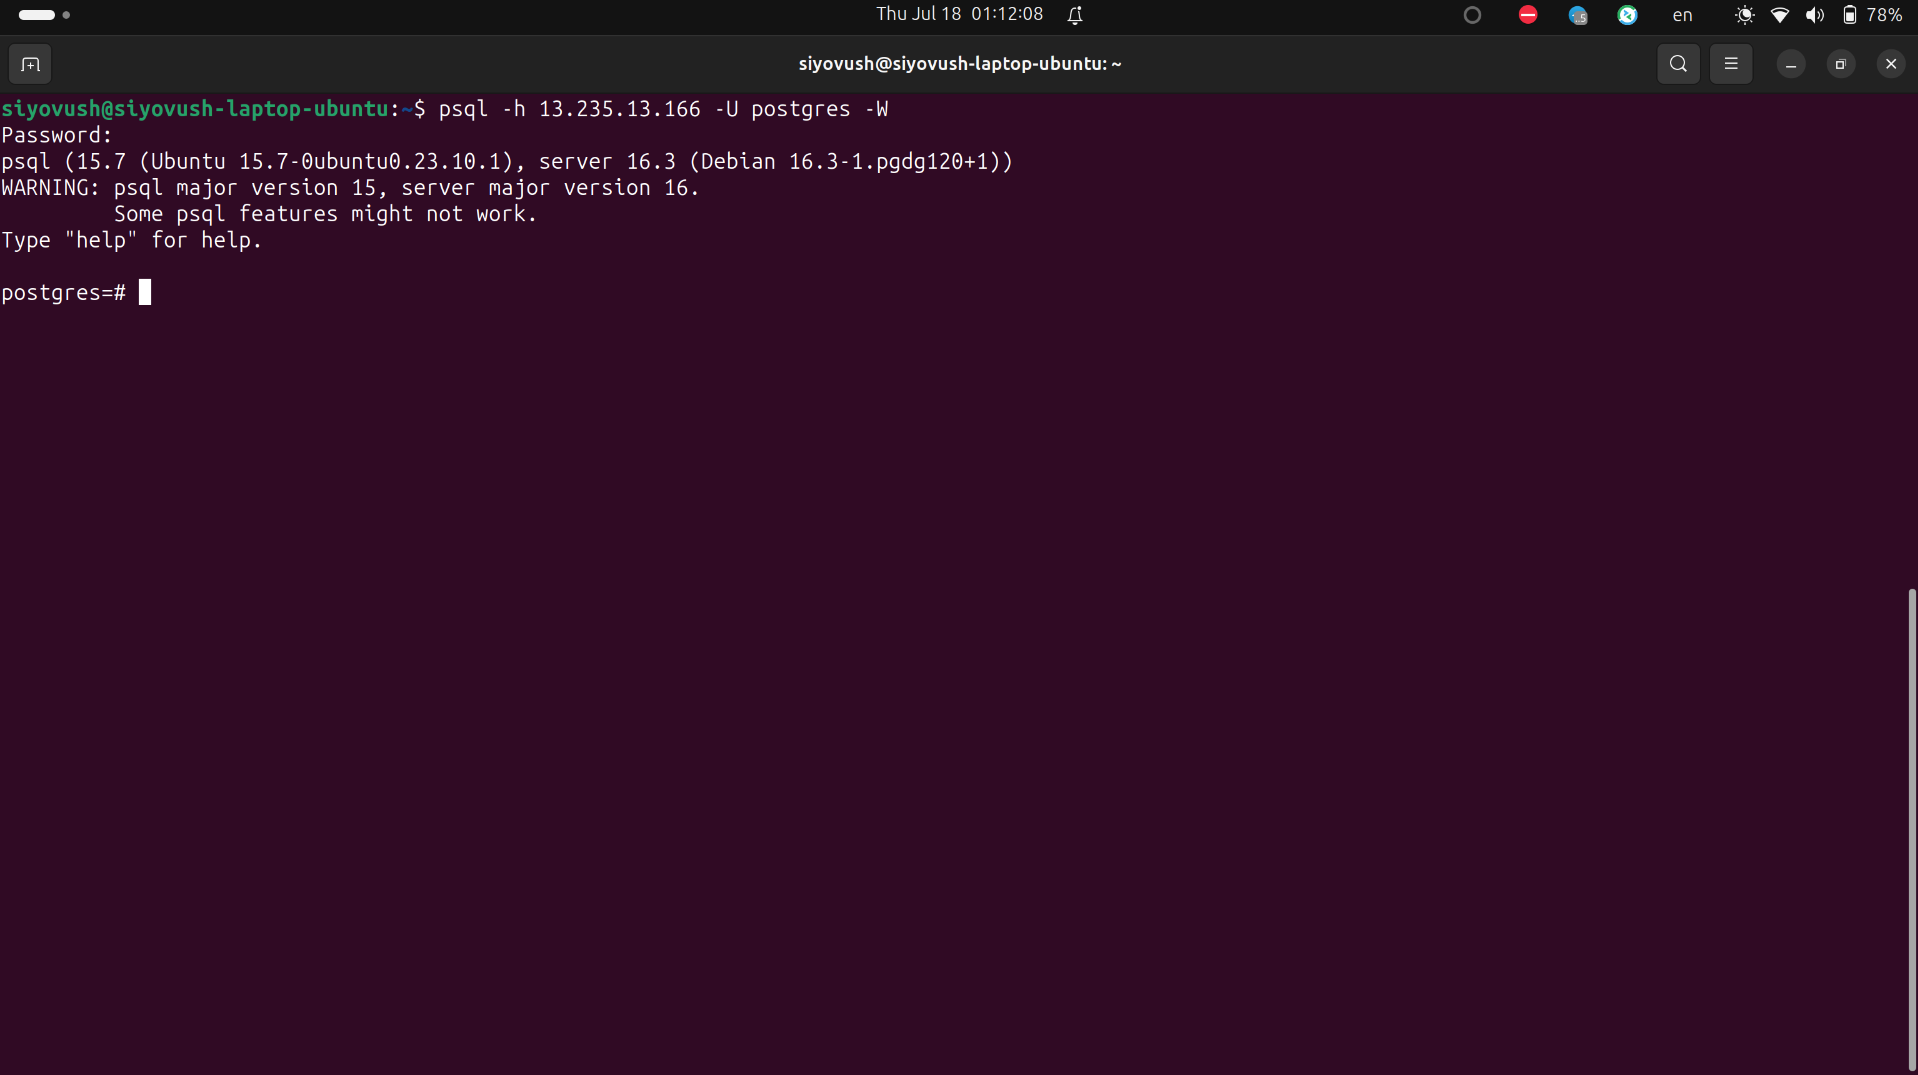
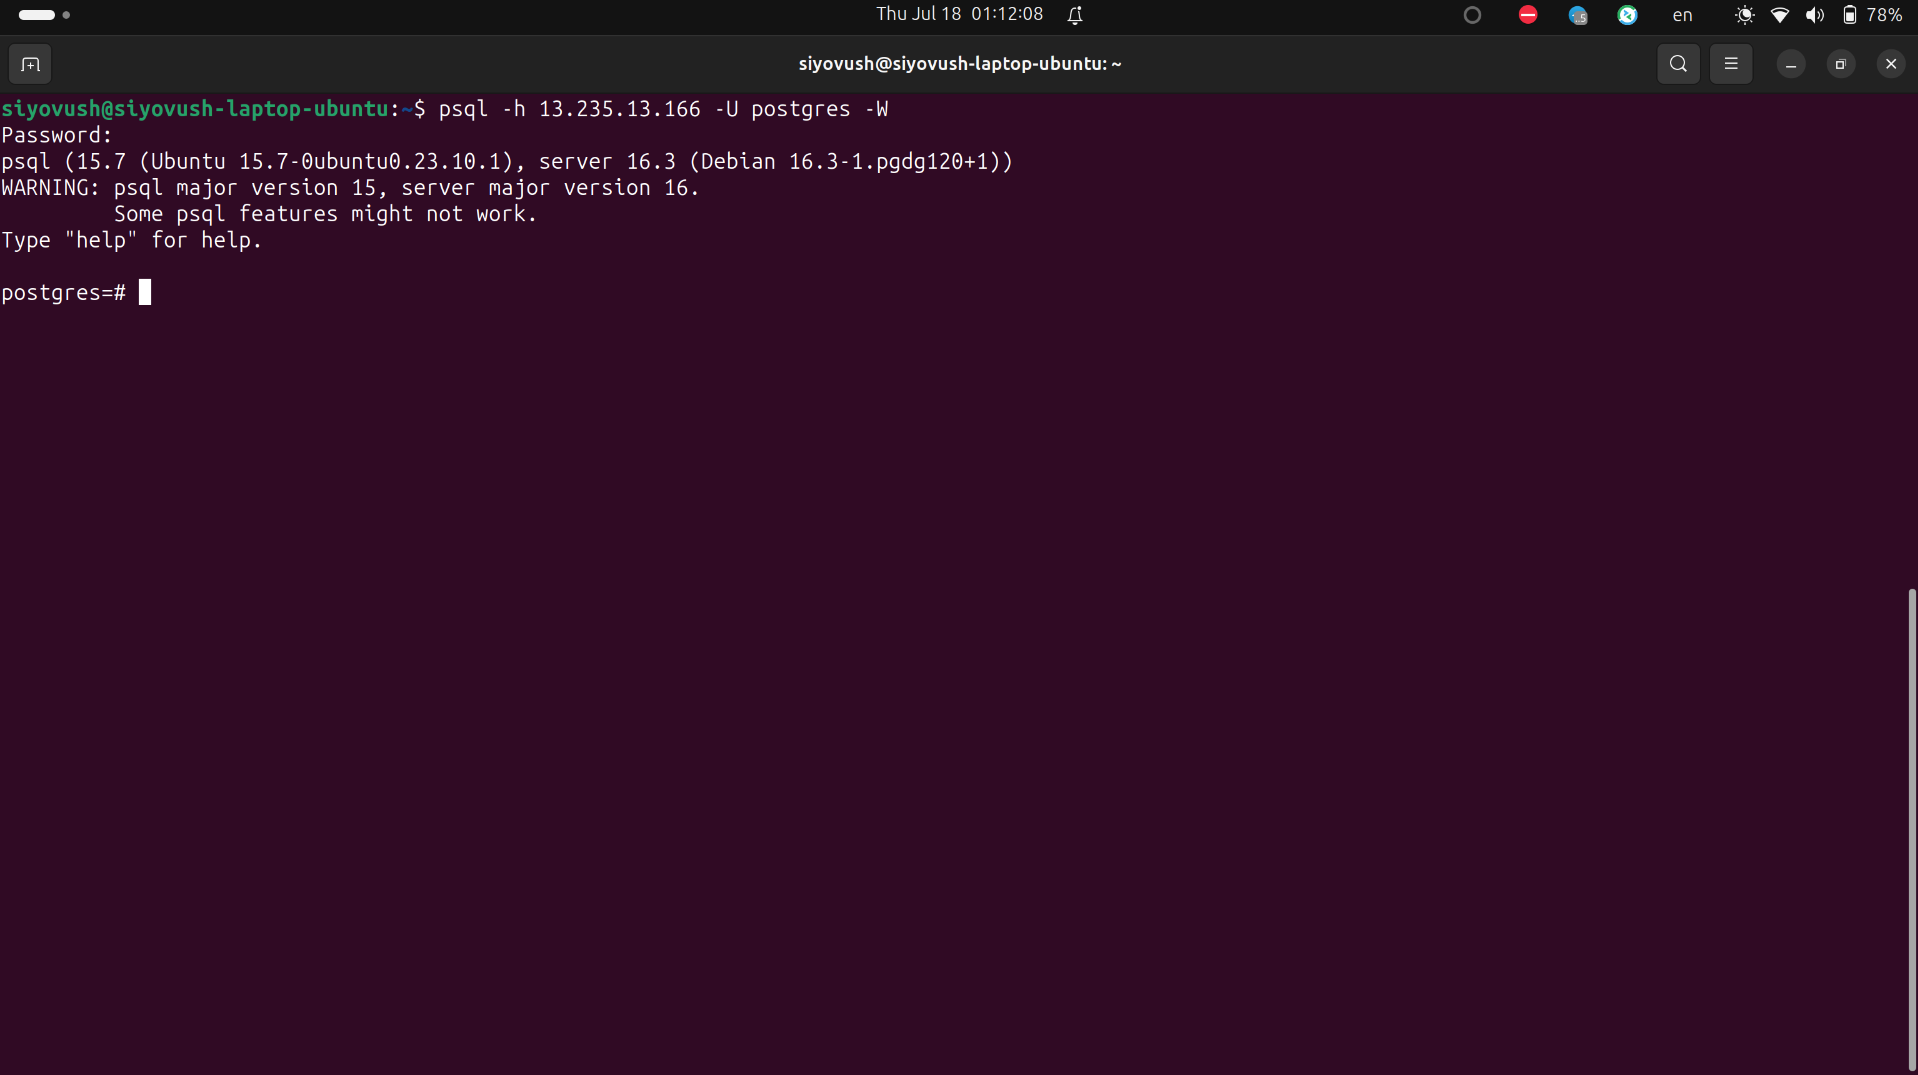

6. Далее надо использовать написанное для предыдущей практики приложение (Написать простое приложение (по сути - API), которое должно отдавать информацию по HTTP). Напишите Dockerfile для сбора приложения в образ. Надо получить Docker image. Попробуйте из этого образа запустить контейнер. (скинуть Dockerfile, образ, приложить инструкцию по запуску образа).

Не смог. У меня C++ + PostgreSQL. С++ запускается а postgresql не запускался нормально в паре с C++. Но в пятом задании я его запустил без приложения: всё заработало.